# Data 3406 Assignment 2
- Intro

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading Packages

In [249]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Loading Data

In [250]:
# path: DELETE THIS LATER

path = "/content/drive/MyDrive/Colab Notebooks/ASSIGNMENT 2/data/"
# Courses
c1courses = pd.read_excel(path+"C1 Courses.xlsx")
c2courses = pd.read_excel(path+"C2 Courses.xlsx")
c3courses = pd.read_excel(path+"C3 Courses.xlsx")
c4courses = pd.read_excel(path+"C4Courses.xlsx")

# Questions
c1questions = pd.read_excel(path+"C1 Questions.xlsx")
c2questions = pd.read_excel(path+"C2 Questions.xlsx")
c3questions = pd.read_excel(path+"C3 Questions.xlsx")
c4questions = pd.read_excel(path+"C4Questions.xlsx")
c4usercourses = pd.read_excel(path+"C4UsersCourses.xlsx")

#Answers
c3answers = pd.read_excel(path+"C3 Answers.xlsx")

#Comments
c1comments = pd.read_excel(path+"C1 Comments.xlsx")
c2comments = pd.read_excel(path+"C2 Comments.xlsx")
c4comments = pd.read_excel(path+"C4Comments.xlsx")
c4usercourses = pd.read_excel(path+"C4UsersCourses.xlsx")

## Cleaning Data
- Explain how you dealt with 0 and missing data values.
- Explain how and why you transformed the data.

## Exploration of Dataset
- How we joined the datasets and different data sources we had access to eg different cycles
- The methods you used to understand the data (especially in the process notebooks).
- The measures of data distributions for numbers: stats that include minimum, maximum,
central tendency, spread measures, SD, IQR and visual presentation, histograms.
- The analysis for correlations, stats and visual presentation.
- Document the independence of each variable from others and your reasoning about this.
- Document your emerging understanding of the adequacy of the raw data and the degree to
which unknowns and unavailable data impact the validity and certainty of the results.
- Explore measures of fairness.
- Report how you identified outliers and explain how you dealt with them.

- Explain how you reasoned about the uncertainty and decisions made about reporting
results to account for that, both in statistics and visual presentation.

### Question/Comment Ratings Summary
- Put summaries of marks (academic mark and average rating and plots here)
- Histogram of distribution of average ratings

## Uncertainty
- What contributes a good question

## Description of the different cycles

## Lateness of Questions
- Yan Question delay file

In [251]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1questions columns:", c1questions.columns.to_list())

c1courses columns: ['CourseID', 'StartDate', 'Deadline_Cmmnt', 'Deadline_Qustn']
c1questions columns: ['id', 'course_id', 'timestamp', 'user', 'avg_rating', 'total_responses', 'total_ratings', 'top_rating_count', 'avg_difficulty', 'total_comments', 'deleted', 'answer', 'numAlts', 'question', 'altA', 'altB', 'altC', 'altD', 'altE', 'explanation']


Cycle 1

In [252]:
c1courses.rename(columns = {"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace = True)
c1questions.rename(columns = {"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}, inplace = True)

In [253]:
c1questions = c1questions.astype({"course_id" : "int64", "question_time" : 'datetime64'})
c1courses = c1courses.convert_dtypes()

c1combined = c1courses.merge(c1questions, on = "course_id")
c1combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,numAlts,question,altA,altB,altC,altD,altE,explanation
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342368,2020-03-04 17:52:14,217514,0.00,0,0,0,0.0000,0,2,A,4,<p>[2a] In early 1950s high quality X-ray dif...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342370,2020-03-04 17:52:14,217514,0.50,7,4,0,0.2500,5,0,A,4,<p>[Table X - Topic 2a] In early 1950s high q...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349814,2020-03-09 15:55:46,636010,2.33,10,9,0,0.2222,6,0,B,4,<p>Which of the following statements is true ...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 5...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 3...,...,<p>DNA polymerase is only able to synthesize ...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349841,2020-03-09 16:16:45,636012,2.25,5,4,0,1.0000,3,0,B,5,<p>The structure of DNA is closely related to...,<p>All base pairs interact by forming three h...,<p>DNA is comprised of nucleotide subunits ea...,<p>The double helix of DNA is stabilized by i...,<p>Each DNA sequence folds into a unique and ...,<p>DNA base pairs are held together by strong...,<p>DNA is made up of nucleotide subunits boun...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349844,2020-03-09 16:17:41,636018,2.67,5,3,0,0.3333,4,0,C,4,"<p>In a DNA molecule, Chargaff's rule means t...",<p>The amount of Adenine and Thymine = The am...,<p>The amount of Cytosine and Guanine = The a...,<p>The amount of Adenine and Guanine = The am...,<p>All of the above</p> ...,...,<p>Chargaff's rule states that the number of ...


Cycle 2


In [254]:
c1combined["question_delta"] = (c1combined["question_time"] - c1combined["question_due"])
c1combined["question_beforedue"] = (c1combined["question_due"] - c1combined["question_time"])
c1combined["late"] = c1combined["question_time"] > c1combined["question_due"]


In [255]:
c2courses.rename(columns = {"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}, inplace = True)
c2courses.drop("CourseName", axis = 1, inplace = True)
c2questions.rename(columns = {"id" : "question_id", "timestamp" : "question_time", "user" : "user_id"}, inplace = True)

In [256]:
c2questions = c2questions.astype({"course_id" : "int64", "question_time" : 'datetime64'})
c2courses = c2courses.convert_dtypes()

c2combined = c2courses.merge(c2questions, on = "course_id")
c2combined.head()

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,question,numAlts,altA,altB,altC,altD,altE,explanation
0,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4391826,2020-03-26 19:10:48,636022,3.5,5,2,0,0.5,3,0,B,<p>Which of the following pair includes a pha...,4,"<p>G1 phase, DNA replication</p> ...","<p>G2 phase, preparation for mitosis</p> ...","<p>S phase, cell division</p> ...","<p>M phase, cell growth</p> ...",...,<p>G1 phase is growth and preparation of the ...
1,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392006,2020-03-26 20:54:26,636011,3.5,8,6,1,1.0,6,2,D,<p>A telomere has a repetitive nucleotide seq...,5,"<p>4, 3, 1, 2, 5</p> ...","<p>1, 2, 3, 4, 5</p> ...","<p>2, 5, 4, 1, 3</p> ...","<p>4, 2, 1, 3, 5</p> ...","<p>2, 4, 1, 5, 3</p> ...",<p>The correct answer is D with steps numbere...
2,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392084,2020-03-26 21:46:58,635990,3.5,3,2,0,1.0,2,0,D,<p>Table 8:</p><p>Which of the following stat...,4,<p>G0 is an optional part of the cell cycle w...,<p>All Eukaryotic cells which divide via the ...,"<p>In G0 phase, a cell replicates its DNA to ...",<p>Some types of cells can enter G0 phase and...,...,<p>The answer is D: G0 phase occurs when cell...
3,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392568,2020-03-27 01:07:25,636008,0.0,0,0,0,0.0,0,2,B,<p>There are some cells with different settin...,5,<p>a</p> ...,<p>b</p> ...,<p>c</p> ...,<p>d</p> ...,<p>e</p> ...,<p>All normal cells including heart cells and...
4,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,4392616,2020-03-27 01:25:01,636014,3.0,1,1,0,1.0,1,2,B,<p>Mary is a healthy 17 years old teenager wh...,5,<p>Too much telomerase activity can cause chr...,<p>The supplement can result in permanent act...,<p>The supplement can result in permanent act...,<p>The activation of telomerase does not allo...,<p>The activation of telomerase lowers the ra...,<p>The progressive shortening of telomeres as...


In [257]:
c2combined["question_delta"] = (c2combined["question_time"] - c2combined["question_due"])
c2combined["question_beforedue"] = (c2combined["question_due"] - c2combined["question_time"])
c2combined["late"] = c2combined["question_time"] > c2combined["question_due"]

Combining

In [258]:
c1combined["cycle"] = 1
c2combined["cycle"] = 2

all_combined = pd.concat([c1combined, c2combined])
all_combined = all_combined.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
#all_combined[all_combined['late']].sort_values(by = 'question_beforedue', ascending = False)
all_combined

,course_id,cycle_start,comment_due,question_due,question_id,question_time,user_id,avg_rating,total_responses,total_ratings,top_rating_count,avg_difficulty,total_comments,deleted,answer,numAlts,question,altA,altB,altC,altD,altE,explanation,question_delta,question_beforedue,late,cycle
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342368,2020-03-04 17:52:14,217514,0.00,0,0,0,0.0000,0,2,A,4,<p>[2a] In early 1950s high quality X-ray dif...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...,-6 days +16:52:04,5 days 07:07:56,False,1
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4342370,2020-03-04 17:52:14,217514,0.50,7,4,0,0.2500,5,0,A,4,<p>[Table X - Topic 2a] In early 1950s high q...,<p>Rosalind Franklin<br /><br /></p> ...,<p>Edwin Chargaff<br /><br /></p> ...,<p>Watson and Crick</p> ...,<p>Frederick Meischer</p> ...,...,<p>It was Franklin. &nbsp;Watson and Crick ob...,-6 days +16:52:04,5 days 07:07:56,False,1
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349814,2020-03-09 15:55:46,636010,2.33,10,9,0,0.2222,6,0,B,4,<p>Which of the following statements is true ...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 5...,<p>DNA polymerase can synthesize mRNA in the ...,<p>DNA polymerase can synthesize DNA in the 3...,...,<p>DNA polymerase is only able to synthesize ...,-1 days +14:55:36,0 days 09:04:24,False,1
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349841,2020-03-09 16:16:45,636012,2.25,5,4,0,1.0000,3,0,B,5,<p>The structure of DNA is closely related to...,<p>All base pairs interact by forming three h...,<p>DNA is comprised of nucleotide subunits ea...,<p>The double helix of DNA is stabilized by i...,<p>Each DNA sequence folds into a unique and ...,<p>DNA base pairs are held together by strong...,<p>DNA is made up of nucleotide subunits boun...,-1 days +15:16:35,0 days 08:43:25,False,1
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,4349844,2020-03-09 16:17:41,636018,2.67,5,3,0,0.3333,4,0,C,4,"<p>In a DNA molecule, Chargaff's rule means t...",<p>The amount of Adenine and Thymine = The am...,<p>The amount of Cytosine and Guanine = The a...,<p>The amount of Adenine and Guanine = The am...,<p>All of the above</p> ...,...,<p>Chargaff's rule states that the number of ...,-1 days +15:17:31,0 days 08:42:29,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,4425742,2020-04-01 20:12:15,637299,0.00,0,0,0,0.0000,0,0,B,4,<p>You've been given the task of isolating a ...,"<p>Yes, the failure to remove the supernatant...","<p>Yes, the failure to remove the supernatant...","<p>No, the failure to remove the supernatant ...","<p>No, the failure to remove the supernatant ...",...,<p>Since DNA is more soluble in its aqueous s...,-1 days +19:12:05,0 days 04:47:55,False,2
535,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,4426098,2020-04-01 05:34:30,637242,0.00,0,0,0,0.0000,0,0,A,5,<p>If we run the&nbsp;PCR (polymerase chain r...,<p>No bands will be formed.</p> ...,<p>Non-specific bands will be formed.&nbsp;</...,<p>Smeared bands will be formed.</p> ...,<p>Proper bands will be formed.&nbsp;</p> ...,<p>I don't know.&nbsp;</p> ...,<p>PCR (polymerase chain reaction) involves t...,-1 days +04:34:20,0 days 19:25:40,False,2
536,21143,2020-03-26,2020-04-08 01:00:10,2020-04-02 01:00:10,4427400,2020-04-01 01:55:39,637287,0.00,0,0,0,0.0000,0,0,D,4,<p>You are in the process of isolating DNA fr...,<p>Continue as per normal but substitute Chel...,<p>Proceed to lyse cells and obtain DNA but c...,<p>Proceed with the experiment as usual since...,<p>None of the above.</p> ...,...,<p>None of the actions are suitable.</p><p>&n...,-1 days +00:55:29,0 days 23:04:31,False,2
537,21143,2020-03

Data Investigation

In [259]:
print("Earliest question was made at:", all_combined["question_time"].min().strftime("%d/%m/%Y"))
print("Latest question was made at:", all_combined["question_time"].max().strftime("%d/%m/%Y"))

Earliest question was made at: 04/03/2020
Latest question was made at: 10/04/2020


In [260]:
delta_grouped = all_combined[["question_time"]].groupby(all_combined["question_delta"].dt.days).count()
delta_grouped['question_delta'] = delta_grouped.index
delta_grouped = delta_grouped.astype({"question_delta" : "int64", "question_time" : 'int64'})

In [261]:
# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
px.bar(delta_grouped, x = "question_delta", y = "question_time", title = "Time after Question due date that a question was made in Cycles 1 and 2",
                 labels={
                     "question_delta": "Days from question due date",
                     "question_time": "Number of Questions"})


In [262]:
# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
student_lateness = all_combined[["user_id", "late"]].groupby("user_id", as_index = False).sum("late")
px.histogram(student_lateness,x= "late",title = "Distribution of late questions submitted",labels={
                     "late": "Days late from due date",
                     "count": "Number of Questions"})

In [263]:
student_lateness.sort_values("late", ascending = False)

,user_id,late
319,637569,6
118,636396,5
179,636734,4
66,636029,4
310,637310,4
...,...,...
146,636424,0
151,636429,0
152,636430,0
153,636431,0


Connecting to cycle 4 groups

In [264]:
student_lateness.reset_index()

,index,user_id,late
0,0,217514,0
1,1,269035,0
2,2,504817,1
3,3,508271,0
4,4,555695,0
...,...,...,...
327,327,640064,1
328,328,640258,1
329,329,641348,1
330,330,641786,0


In [268]:
c4usercourses.rename(columns = {"user" : "user_id", "Team" : "team"}, inplace = True)
c4usercourses_lateness = c4usercourses.merge(student_lateness.reset_index(drop = True), on = "user_id")


In [269]:
c4usercourses_lateness.sort_values(by = "late", ascending = False)

,user_id,course_id,team,late
138,637569,21326,Blue,6
129,636396,21326,Pink,5
170,636734,21327,Brown,4
40,636029,21320,Pink,4
266,637310,21328,Pink,4
...,...,...,...,...
131,604835,21326,Green,0
132,636439,21326,Purple,0
134,636429,21326,Yellow,0
137,636416,21326,Blue,0


In [270]:
student_late_boolean = all_combined[["user_id", "late"]].groupby("user_id", as_index = False).any("late")
team_lateness_boolean = c4usercourses.merge(student_late_boolean, on = "user_id")

# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
fig = px.histogram(team_lateness_boolean,x="team",y="late",color = "team", color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, title = "Distribution of late questions in each team",labels={
                     "team": "Groups",
                     "late": "Number of Questions Submitted Late"})

fig.update_layout(showlegend=False) 

In [271]:
members_late = team_lateness_boolean[["team", "late"]].groupby("team").sum()
team_size = team_lateness_boolean[["team", "user_id"]].groupby("team").nunique()

members_late["num_members"] = team_size
members_late["perc_late"] = members_late["late"] / members_late["num_members"]
members_late = members_late.reset_index()

# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
fig = px.bar(members_late,x="team",y="perc_late",color = "team", color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, title = "Proportion of members in the team who made a late question in cycles 1 and 2",labels={
                     "team": "Groups",
                     "perc_late": "Percentage of questions submitted late"})

fig.update_layout(showlegend=False) 

In [ ]:
c4questions.rename(columns = {"user" : "user_id"}, inplace = True)
c4usercourses2 = c4usercourses.merge(c4questions, on = "user_id")
c4usercourses2.groupby("team").mean()

In [ ]:
c4usercourses2.groupby("team").count()

In [ ]:
c4usercourses.groupby("team")["user_id"].nunique()

Explore data
We will look at the questions data first, followed by the answers data
This will give us a good overview of what ranges our values lie in and any bias we need to consider
Keep in mind each student was required to answer 40 questions!
Questions data

In [ ]:
c3questions.head()

- We aren't interested in the number of alts or the alternate options (only the correct answer)
- We will use the correct answer to calculate the percentage correct for each of the users
What about the answers data?

In [ ]:
# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
px.box(c3questions, y='avg_difficulty', title = "Boxplot of Average Difficulty",labels={
                     "avg_difficulty": "The Average Difficulty Rating"})

In [ ]:
# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
px.box(c3questions, y='avg_rating', title = "Boxplot of average rating for questions",labels={
                     "avg_rating": "The average rating for each question"})

- Most students rated question difficulty quite low
- Most questions had a reasonable rating so hopefully question quality does not affect our analysis too much (but keep in mind)
- Let's see how they do in answering these questions

In [ ]:
c3answers.head()

- We will use the 'answer' column to determine if a student got a question correct

> Indented block



## Pre-processing and joins
- Firstly we'll construct dataframes using a subset of the columns (we don't need them all)
- We'll also rename some of these columns for clarity

In [ ]:
qs_selected = c3questions[['id', 'timestamp', 'user', 'avg_rating', 'avg_difficulty', 'total_responses', 'total_comments', 'answer', 'course_id']] # Select certain columns
qs_selected = qs_selected.rename(columns={'id' : 'question_id', 'timestamp' : 'question_time', 'user' : 'user_id', 'answer' : 'correct_answer'})                   # Rename
qs_selected.head()

In [ ]:
ans_selected = c3answers[['id', 'timestamp', 'user', 'question_id', 'answer']]
ans_selected = ans_selected.rename(columns={'id' : 'answer_id', 'timestamp' : 'answer_time', 'user' : 'user_id', 'answer' : 'chosen_answer'})
ans_selected.head()

- We now have a much more organised questions dataframe, containing all the information we require for our analysis
- The column headings are also much clearer

## Analysis

### Merging answers with questions
- Need to do this so we know what the correct answer is!
- `q_and_a` will be the answers but with the correct answer as well
- We may need more information about a particular question later but for now this is ok

In [ ]:
q_and_a = ans_selected.merge(qs_selected[['question_id', 'correct_answer']], on='question_id')
q_and_a.head()

### Finding the % of correct answers by each student
- We're going to calculate how many questions each student got correct
- Then using the total number of answers for each student, we will find the percentage of questions that each student got correct using the following formula $\frac{\text{num_correct}}{\text{total_answers}}$

In [ ]:
# Authors: Yan and Tash
# Supporter: Johanna
# Date:
answers_by_student = q_and_a[['user_id', 'answer_id']].groupby('user_id', as_index=False).count() # Count number of answers per user

px.histogram(answers_by_student, x = "answer_id",labels={
                     "answer_id": "Number of answers per student"}, title = "Histogram of number of answers by each student")


In [284]:
# Authors: Yan and Tash
# Supporter: Johanna
# Date:
px.box(answers_by_student, y='answer_id', title = "Boxplot of number of answers per student",labels={
                     "answer_id": "Number of answers per student"})

**Interesting summaries:**
- Most students answered 40 questions (the required amount)
- Some students answered less than 20
- Some students answered 100 questions

- Now let's move on to the calculation of the number of correct answers
- We'll start by adding a new bool column to indicate whether a student was correct

In [285]:
q_and_a['student_correct'] = q_and_a['chosen_answer'] == q_and_a['correct_answer']                    # Add new bool column to indicate whether an answer was correct
correct_by_student = q_and_a[['user_id', 'student_correct']].groupby('user_id', as_index=False).sum() # Create new dataframe and count number of correct answers, summing our new bool column

correct_by_student['total_answers'] = answers_by_student['answer_id']
correct_by_student['percent_correct'] = correct_by_student['student_correct'] / correct_by_student['total_answers']  # Calculate percentage of questions a student answered correctly

# Plot summary statistics for percentage of correct answers
px.histogram(correct_by_student, x = "percent_correct",
              labels ={"percent_correct": "Percentage of Correct Answers Given by a Student"},
             title= "Distribution of the Percentage of Correct Answers Given by a Student out of the Total number of Questions Answered",
             marginal = "box", opacity=0.8, color_discrete_sequence=['green'])

- The percentage of correct answers follows a normal distrubution very closely
- Cool!

### Team distrubution of correctness
- Now that we have the percentage of correct answers for each student, lets look at how this carries across to teams
- First, let's join the students to their respective Cycle 4 groups

In [ ]:
c4usercourses = c4usercourses.rename(columns={'user' : 'user_id', 'Team' : 'team'})     # Rename columns so we can merge neatly
answers_team = correct_by_student.merge(c4usercourses, on='user_id')                  # Merge dataframes so we have team data for each student
answers_team.head()

- We now have team data for each of our students
- Next step is to group by team and average the percent_correct for each team member

,user_id,student_correct,total_answers,percent_correct,course_id,Groups
team,,,,,,
Black,636837.281250,24.406250,44.718750,0.541133,21324.843750,Black
Blue,623989.241379,27.034483,48.379310,0.543374,21325.000000,Blue
Brown,631574.531250,22.718750,45.343750,0.495636,21325.031250,Brown
Green,626588.974359,26.512821,47.461538,0.555908,21325.179487,Green
Pink,634451.810811,30.027027,52.837838,0.545533,21325.081081,Pink
Purple,636865.538462,20.384615,42.846154,0.474445,21326.153846,Purple
Red,632513.638889,23.750000,46.111111,0.508932,21325.277778,Red
White,632100.761905,27.047619,43.809524,0.615350,21326.666667,White
Yellow,636752.258065,26.838710,48.677419,0.537623,21326.516129,Yellow


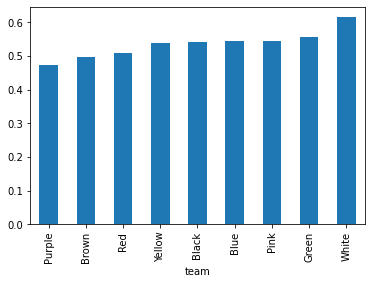

In [288]:
answers_groups_by_team = answers_team.groupby('team').mean()
answers_groups_by_team.sort_values(by='percent_correct')['percent_correct'].plot.bar()

# adding color as a column 
team_colours = ['Black', 'Blue', 'Brown', 'Green', 'Pink', 'Purple', 'Red', 'White', 'Yellow']

answers_groups_by_team["Groups"]= team_colours
answers_groups_by_team

In [289]:
#fig = px.bar(data_canada, x='year', y='pop')
#fig.show()
fig=px.bar(answers_groups_by_team,x='Groups',y="percent_correct",color = "Groups", 
        color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, 
        title = "Proportion of members in the team who made a late question in cycles 1 and 2",
        labels={"Groups": "Groups","percent_correct": "Percentage of Correctly answered questions by Groups"})
fig.update_layout(showlegend=False) 

- The white team got the highest average percentage correct and purple the lowest
- All teams are quite close together

In [290]:


boxes_perc_correct = px.box(answers_team, x = 'team', y = 'percent_correct',color="team",
  
           color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'},
           title = "Boxplots aggregated by Team",
          labels={"team": "Groups","percent_correct": "Percentage of Correctly answered questions by Groups"})


boxes_student_correct = px.box(answers_team, x = 'team', y = 'student_correct',color="team",
  
           color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'},
          
          labels={"team": "Groups","student_correct": "Number of Correctly answered questions by Groups (Students)"})

boxes_perc_correct.update_layout(showlegend=False) 
boxes_student_correct.update_layout(showlegend=False) 
boxes_perc_correct.show()
boxes_student_correct.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd2317eb70>,
      dtype=object)

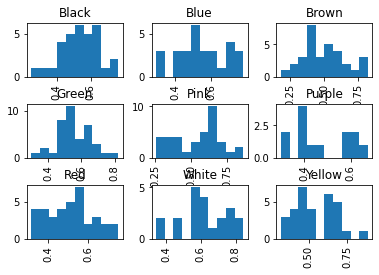

In [291]:
answers_team.hist('percent_correct', by='team')

In [292]:
gp_perc =px.histogram(answers_team, x = "percent_correct",facet_col='team',
              #labels ={"percent_correct": "Percentage of Correct Answers Given by a Student"},
             title= "Distribution of the % of Correct Answers Given Within Groups",
             opacity=0.8, color = 'team', 
             color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'},
             labels={"team": "Team"})
gp_perc.update_layout(showlegend=False) 

- The teams are not too different from one another in distribution either,
- White team is definitely made up of the best performers on average though, with a min higher than all other groups, and a median higher than all other groups

### Investigating time
- We'll now investigate the time it took each student to answer a question and will use that as an indicator of 'motivation'
- First, we need to get a deadline by joining with the Courses data from Cycle 3

In [ ]:
c3courses_selected = c3courses[['CourseID', 'StartDate', 'DeadlineAnswer']]
c3courses_selected = c3courses_selected.rename(columns={'CourseID' : 'course_id', 'StartDate' : 'start_date', 'DeadlineAnswer' : 'answer_deadline'})
qs_with_deadline = qs_selected.merge(c3courses_selected, on='course_id')

qs_with_deadline.head()

### Merging questions with deadline to answers
- We've joined to the answer deadline
- Now we need to join the questions with a deadline to their answers like we did previously

In [ ]:
q_and_a_deadline = ans_selected.merge(qs_with_deadline[['question_id', 'correct_answer', 'start_date', 'answer_deadline']], on='question_id')
q_and_a_deadline = q_and_a_deadline.astype({'answer_time' : 'datetime64'})
q_and_a_deadline.head()

- We now have a dataframe with an answer on each row, with the task start date, as well as the answer deadline and time
- Let's analyze the time data by:
    - Creating a new column for storing the time before the due date a question was answered
    - Creating a column to indicate if a question was answered late

In [ ]:
q_and_a_deadline['time_delta'] = q_and_a_deadline['answer_deadline'] - q_and_a_deadline['answer_time']  # 'Time difference between due date and answer time' column
q_and_a_deadline['late'] = q_and_a_deadline['time_delta'].dt.days < 0                                   # 'Answer was posted late' column
q_and_a_deadline
#q_and_a_deadline['time_delta'].dt.days.plot.hist() # Plot days before due date

In [297]:
px.histogram(q_and_a_deadline, x = pd.to_timedelta(q_and_a_deadline['time_delta'],unit='d'),
              labels ={'time_delta': "Days Before Due Date"},
             title= "Distribution of Questions Submitted before the Due Date ",
              opacity=0.8, color_discrete_sequence=['green'])

- The above histogram shows the number of days people answered before the deadline

## Lateness of Comments
- Charlie Question delay file

In [298]:
print("c1courses columns:", c1courses.columns.to_list())
print("c1comments columns:", c1comments.columns.to_list())

c1courses columns: ['course_id', 'cycle_start', 'comment_due', 'question_due']
c1comments columns: ['Comment_ID', 'course_id', 'Timestamp', 'user', 'Question_ID', 'Comment']


- From the above cell we can see that we need to rename some columns so we can join them nicely
- We will rename and merge the two dataframes in the below cell

In [299]:
c1courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Cmmnt" : "comment_due", "Deadline_Qustn" : "question_due"}, inplace=True) # Rename CourseID to course_id
c1comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)

- There is an annoying header row located in the middle of the data that we need to remove
- We'll remove it now by making sure the "course_id" column is not equal to the text " course_id "

In [300]:
c1comments = c1comments[c1comments["course_id"] != " course_id "]

- We will convert the data types of both the dataframes so they join properly too

In [301]:
#c1comments["course_id"] = pd.to_numeric(c1comments["course_id"])
c1comments = c1comments.astype({"course_id" : "int64", "comment_time" : 'datetime64'})
c1courses = c1courses.convert_dtypes()

c1combined = c1courses.merge(c1comments, on="course_id") # Merge the dataframes
c1combined.head() # Show the first 5 rows


,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7039922,2020-03-04 18:10:30,634147,4342370,Terrible question.
1,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045684,2020-03-09 16:08:43,636012,4349814,I think the questions and answers were concise...
2,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045695,2020-03-09 16:14:25,636010,4342370,This question concerns history rather than sci...
3,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045749,2020-03-09 16:57:54,558135,4349855,I found this question particularly specific an...
4,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7045750,2020-03-09 16:58:39,636010,4349841,The question assesses your knowledge on a broa...


- Now we have a dataframe that has the due date for the comment that was made for each of the comments

## Performing Analysis
- Next, we can calculate how long it took a student to write a comment after the question_due date
    - We're doing this to find out how long it took for a student to complete a comment after all the questions were due
    - We can use this metric to help us determine how motivated a student was
- We'll also calcualte a column to indicate how early before the comment_due date a student provided a comment on a question

### Creation of new columns
- We create the columns:
    - `comment_delta` (number of days after question due date that the comment was posted)
    - `comment_beforedue` (number of days before the comment due date that the comment was posted)
    - `late` (will be True if the comment was submitted after the comment_due date, False otherwise)

In [304]:
c1combined["comment_delta"] = (c1combined["comment_time"] - c1combined["question_due"])
c1combined["comment_beforedue"] = (c1combined["comment_due"] - c1combined["comment_time"])
c1combined["late"] = c1combined["comment_time"] > c1combined["comment_due"]

## Doing the same grouping that we did for Cycle 1 - but for cycle 2
- I won't go over the details here just performing similar steps as we did for cycle 1

In [305]:
c2courses.rename(columns={"CourseID" : "course_id", "StartDate" : "cycle_start", "Deadline_Comment" : "comment_due", "Deadline_Question" : "question_due"}, inplace=True) # Rename columns
#c2courses.drop("CourseName", axis=1, inplace=True) # Remove the 'CourseName' column - we don't need it
c2comments.rename(columns={"Timestamp" : "comment_time", "CommentID" : "comment_id", "user" : "user_id", "Question_ID" : "question_id", "Comment" : "comment"}, inplace=True)

In [306]:
# Set data types
c2comments = c2comments.astype({"course_id" : "int64", "comment_time" : 'datetime64', "user_id" : "int64"}) 
c2courses = c2courses.convert_dtypes() 

# Merge the dataframes
c2combined = c2courses.merge(c2comments, on="course_id") 
c2combined.head()

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment
0,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7110756,2020-03-27 23:02:16,636006,4394370,I think this is a good question. If you want t...
1,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7112982,2020-03-28 11:49:09,635990,4394722,I think the answer to this question might be p...
2,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7112999,2020-03-28 11:54:41,635990,4391826,I thought this question was a good test of kno...
3,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7113019,2020-03-28 12:02:39,635990,4395323,"I thought this question was really good, as it..."
4,21140,2020-03-23,2020-04-05 01:00:10,2020-03-30 01:00:10,7113038,2020-03-28 12:10:55,635990,4396604,"I think this question was quite good, although..."


In [307]:
c2combined["comment_delta"] = (c2combined["comment_time"] - c2combined["question_due"])
c2combined["comment_beforedue"] = (c2combined["comment_due"] - c2combined["comment_time"])
c2combined["late"] = c2combined["comment_time"] > c2combined["comment_due"]

### Combining the two cycles into one DataFrame
- Now we need to combine the two dataframes into one by using `.concat()`
- We'll add an ID to each individual dataframe so we know what cycle they belong to

In [308]:
c1combined["cycle"] = 1
c2combined["cycle"] = 2

all_combined = pd.concat([c1combined, c2combined])
all_combined = all_combined.astype({"course_id" : "int64", "user_id" : "int64", "question_id" : "int64"})
all_combined[all_combined['late']].sort_values(by='comment_beforedue', ascending=False)

,course_id,cycle_start,comment_due,question_due,Comment_ID,comment_time,user_id,question_id,comment,comment_delta,comment_beforedue,late,cycle
2043,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7070065,2020-03-19 01:01:09,636844,4353868,The question is a little confusing because of ...,7 days 00:00:59,-1 days +23:59:01,True,1
539,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062964,2020-03-17 01:01:57,636027,4350515,Basic question that demonstrates recall of inf...,7 days 00:01:47,-1 days +23:58:13,True,1
2733,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7074889,2020-03-20 01:01:59,637312,4356537,All this question requires is to know the func...,7 days 00:01:49,-1 days +23:58:11,True,1
952,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7136367,2020-04-07 01:02:34,636830,4415550,I think this was a pretty straightforward ques...,6 days 00:02:24,-1 days +23:57:36,True,2
540,20995,2020-03-09,2020-03-17 01:00:10,2020-03-10 01:00:10,7062968,2020-03-17 01:02:45,636042,4350561,Great question. Especially for study. Makes yo...,7 days 00:02:35,-1 days +23:57:25,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7083996,2020-03-21 18:51:24,636919,4353630,"This question is easy, students have to pay at...",9 days 17:51:14,-3 days +06:08:46,True,1
2062,21038,2020-03-11,2020-03-19 01:00:10,2020-03-12 01:00:10,7084039,2020-03-21 18:58:24,636919,4353750,This question requires us to recall the functi...,9 days 17:58:14,-3 days +06:01:46,True,1
2805,21039,2020-03-12,2020-03-20 01:00:10,2020-03-13 01:00:10,7092265,2020-03-23 00:58:12,637292,4355861,This is a clear simple question that tests rec...,9 days 23:58:02,-3 days +00:01:58,True,1
1026,21142,2020-03-25,2020-04-07 01:00:10,2020-04-01 01:00:10,7144697,2020-04-10 05:54:18,636252,4423617,Great application question requiring the under...,9 days 04:54:08,-4 days +19:05:52,True,2


## Investigating our data
- Lets first look at the comment time in general
- Followed by the number of unqiue students who commented past the due date

In [309]:
print("Earliest comment was made at:", all_combined["comment_time"].min().strftime("%d/%m/%Y"))
print("Latest comment was made at:", all_combined["comment_time"].max().strftime("%d/%m/%Y"))

Earliest comment was made at: 04/03/2020
Latest comment was made at: 10/04/2020


In [311]:


delta_grouped = all_combined[["comment_time"]].groupby(all_combined["comment_delta"].dt.days).count()
delta_grouped['comment_delta'] = delta_grouped.index
delta_grouped = delta_grouped.astype({"comment_delta" : "int64", "comment_time" : 'int64'})

px.bar(delta_grouped, x = "comment_delta", y = "comment_time", title = "Time after the Comments deadline that a Comment was made in Cycles 1",labels={"comment_delta": "Days from Comments due date",
                     "comment_time": "Number of comments"})


In [312]:
student_lateness = all_combined[["user_id", "late"]].groupby("user_id", as_index=False).sum("late")

- Plot the number of days a comment was late

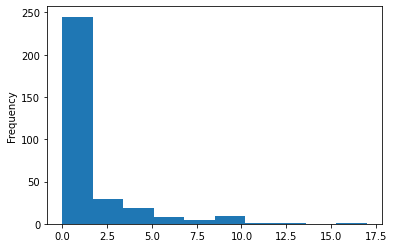

In [313]:
student_lateness["late"].plot(kind="hist") 

In [314]:
px.histogram(student_lateness, x = "late", title = "Number of Days a Comment was late",labels={"late": "Days after the Comments due date"})

- Below is a dataframe of the students who were late (sorted by number of late comments)

In [315]:
student_lateness.sort_values("late", ascending=False)

,user_id,late
66,636027,17
56,636017,13
205,636844,11
316,640258,10
282,637293,10
...,...,...
139,636418,0
140,636419,0
141,636420,0
142,636421,0


### Connecting the students to their cycle 4 groups
- We need to link the students and their number of late comments do their groups in cycle 4
- This is so we can evaluate the impact of student 'lateness'/motivation on their marks and results

In [316]:
c4usercourses.rename(columns={"user" : "user_id", "Team" : "team"}, inplace=True) # Rename columns
c4usercourses_lateness = c4usercourses.merge(student_lateness.reset_index(drop=True), on="user_id") # merge the columns


### Showing the number of late students
- Below is a dataframe of late students
- Below that is a graph showing the lateness of students by team

In [ ]:
c4usercourses_lateness.sort_values(by="late", ascending=False) # Sort the columns for output by lateness

In [320]:
student_late_boolean = all_combined[["user_id", "late"]].groupby("user_id", as_index=False).any("late")
team_latenes_boolean2 = c4usercourses.merge(student_late_boolean, on="user_id")
#team_latenes_boolean2.groupby("team")["late"].sum().plot.bar()

team_latenes_boolean2

#.plot.bar()
#team_latenes_boolean

,user_id,course_id,team,late
0,636031,21320,Black,False
1,635993,21320,Black,True
2,636008,21320,Black,False
3,636010,21320,Black,False
4,635988,21320,Black,False
...,...,...,...,...
272,637302,21328,Red,True
273,637272,21328,Pink,True
274,637312,21328,Red,True
275,637276,21328,Blue,True


In [321]:
#c4usercourses.rename(columns = {"user" : "user_id", "Team" : "team"}, inplace = True)
#c4usercourses_lateness = c4usercourses.merge(student_lateness.reset_index(drop = True), on = "user_id")
#c4usercourses_lateness.sort_values(by = "late", ascending = False)



#student_late_boolean = all_combined[["user_id", "late"]].groupby("user_id", as_index = False).any("late")
#team_lateness_boolean = c4usercourses.merge(student_late_boolean, on = "user_id")

# Authors: Yan and Tash
# Supporter: Johanna
# Date: 
fig = px.histogram(team_latenes_boolean2,x="team",y="late",color = "team", color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, title = "Distribution of late questions in each team",labels={
                     "team": "Groups",
                     "late": "Number of Comments Submitted Late"})

fig.update_layout(showlegend=False) 



### Proportion of team who were late
- Below is a graph showing the Proportion of the team members who were late
- This is calcualted by (number of late team members) / (number of total team members)
- Yellow has the highest % of lately submitted comments

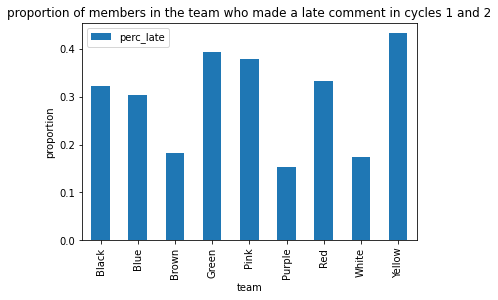

In [245]:
c4usercourses[c4usercourses['team'] == 'Pink']
team_latenes_boolean[team_latenes_boolean['team'] == 'Pink']

# Find number of members late and size of each team
members_late1 = team_latenes_boolean[["team", "late"]].groupby("team").sum()
team_size1 = team_latenes_boolean[["team", "user_id"]].groupby("team").nunique()

members_late1["num_members"] = team_size
members_late1["perc_late"] = members_late1["late"] / members_late1["num_members"] 
members_late1 = members_late1.reset_index()
members_late1[["team", "perc_late"]].plot.bar(x="team", title="proportion of members in the team who made a late comment in cycles 1 and 2", ylabel="proportion")

In [246]:


# Authors: Charlie and Johanna
# Supporter: Tash 
# Date: 
fig = px.bar(members_late1,x="team",y="perc_late",color = "team", color_discrete_map = {'Pink': 'hotpink','Green': 'mediumseagreen', 'Yellow': 'gold','Black': 'black','Blue': 'royalblue','Red': 'tomato', 'Brown': 'peru', 'White': 'white','Purple': 'mediumpurple'}, title = "Proportion of members in the team who made a late question in cycles 1 and 2",labels={
                     "team": "Groups",
                     "perc_late": "Percentage of Comments submitted late"})

fig.update_layout(showlegend=False) 

## Quality of Comment
- Abdullah's file